In [54]:
import pandas as pd
import plotly.express as px
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

import utils as utils

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

%reload_ext autoreload
%autoreload 2

In [55]:
def customAccuracy(predicted, actual, accuracy):
    total = 0
    true = 0
    for i,y in zip(predications,actual):
        temp = y * accuracy/100
        bottomRange = y - temp
        topRange = y + temp
        if (i > bottomRange and i < topRange):
            true += 1
            total += 1
        else:
            total += 1
            
    return true/total

In [56]:
url1 = "https://raw.githubusercontent.com/MikePlekan/Real-Estate-project/Michael/data.csv"
url2 = "https://raw.githubusercontent.com/MikePlekan/Real-Estate-project/Michael/sales.csv"

df = pd.read_csv(url1)
sales = pd.read_csv(url2)


The price for the data is: $195250.0
The Q1 for the data is: $148000.0
The Q2 for the data is: $270000.0
The IQR for the data is: $122000.0


Text(0.5, 0, 'Price ($)')

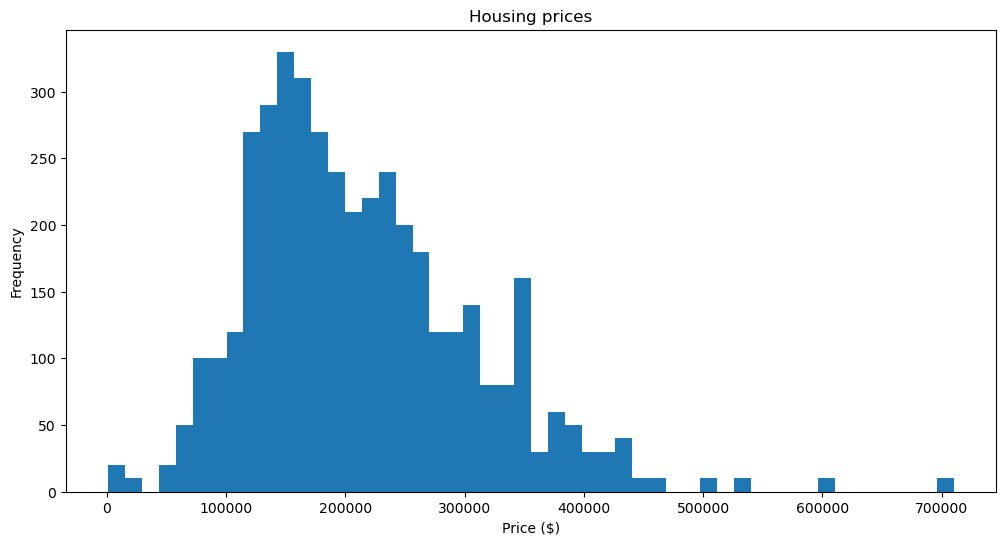

In [57]:
prices = sales['saleamt']
median = np.median(prices)
q3,q1 = np.percentile(prices,[75 ,25])
print(f"The price for the data is: ${median}")
print(f"The Q1 for the data is: ${q1}")
print(f"The Q2 for the data is: ${q3}")
print(f"The IQR for the data is: ${q3-q1}")

sales['saleamt'].plot.hist(bins=50, figsize=(12,6))
plt.title("Housing prices")
plt.xlabel("Price ($)")

Coefficient of determination: 0.4037
corr coeff:                   0.6354
corr coeff^2:                 0.4037
The intercept for the line-of-best-fit is 10112.44
The slope for the line-of-best-fit is     110.47


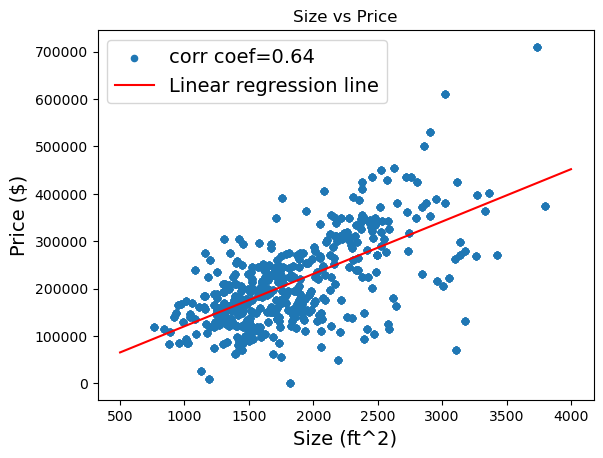

In [68]:
# Model
dfReg = df
dfReg['price'] = sales['saleamt']
model = LinearRegression()

x = dfReg['universalsize'].values.reshape(-1,1)
y = dfReg['price'].values

# Perform regression
model.fit(x,y)

# Calculate r^2
r_sq = model.score(x, y)
print(f'Coefficient of determination: {r_sq:.4f}')

cc = dfReg[['universalsize','price']].corr().iloc[0][1]
print(f'corr coeff:                   {cc:.4f}')
print(f'corr coeff^2:                 {cc**2:.4f}')

# Slope and intercept of the line-of-best-fit
print(f"The intercept for the line-of-best-fit is {model.intercept_:.2f}")
print(f"The slope for the line-of-best-fit is     {model.coef_[0]:.2f}")

# The equation for a line is
# y = mx + b
b = model.intercept_
m = model.coef_
xpts = np.linspace(500,4000)
ypts = m*xpts + b

# Plotting
df.plot.scatter(x = 'universalsize' ,y = 'price',label=f'corr coef={cc:.2f}')
plt.title("Size vs Price")
plt.xlabel(f"Size (ft^2)", fontsize=14)
plt.ylabel("Price ($)", fontsize=14)
plt.plot(xpts,ypts,'r-', label='Linear regression line')
plt.legend(fontsize=14)

Text(0, 0.5, 'Price ($)')

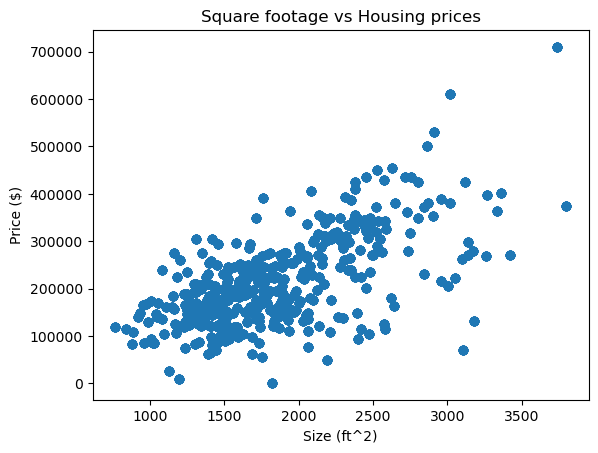

In [47]:
plt.scatter(df['universalsize'], sales['saleamt'])
plt.title("Square footage vs Housing prices")
plt.xlabel("Size (ft^2)")
plt.ylabel("Price ($)")

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df[['yearbuilt','universalsize','beds','bathstotal']],sales['saleamt'], test_size=0.6, random_state=42)

#Decision Tree creatation
clf = HistGradientBoostingClassifier()

clf.fit(X_train, y_train)

predications = clf.predict(X_test)

accuracy = metrics.adjusted_rand_score(y_test, predications)

print(f"accuracy: {accuracy:.2f}")
customAccuracy(predications, y_test, 10)

accuracy: 0.08


0.20055821371610846